In [1]:
# Import necessary modules

%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

LOG.propagate = False

In [192]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-13 04:54:57,455 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c5:6d:2f:4b
2024-03-13 04:55:02,177 | INFO     |: Connected to c0:89:c5:6d:2f:4b


In [3]:
tof_reading = []   # Stores the sensor reading in millimeters
tof_extrapolate = []   # Stores the extrapolated sensor reading in millimeters
pid_ctrl = []
p_ctrl = []
i_ctrl = []
d_ctrl = []
pid_error = []
timestamp = []      # Timestamps in milliseconds

def notification_handler(uuid, byte_array):
    tof_reading.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[0])))
    tof_extrapolate.append(((int) (ble.bytearray_to_string(byte_array).split(", ")[1])))
    pid_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[2])))
    p_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[3])))
    i_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[4])))
    d_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[5])))
    pid_error.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[6])))
    timestamp.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[-1])))

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [193]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [194]:
ble.send_command(CMD.KP_SET, "0.3")

In [195]:
ble.send_command(CMD.KI_SET, "0.001")

In [197]:
ble.send_command(CMD.KD_SET, "100")

In [198]:
tof_reading.clear()
tof_extrapolate.clear()
pid_ctrl.clear()
p_ctrl.clear()
i_ctrl.clear()
d_ctrl.clear()
pid_error.clear()
timestamp.clear()

ble.send_command(CMD.START_RECORD, "")

2024-03-13 04:56:28,035 | INFO     |: Disconnected from C0:89:C5:6D:2F:4B


In [162]:
ble.send_command(CMD.STOP_RECORD, "")

In [163]:
ble.send_command(CMD.GET_PID_INFO, "")

In [178]:
timestamp[-1]-timestamp[0]

9431.0

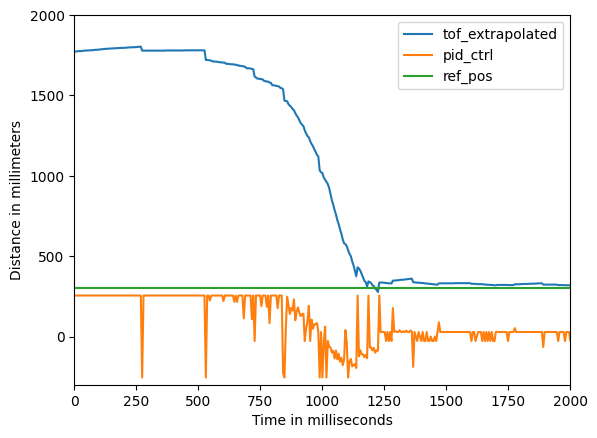

2024-03-13 00:19:29,699 | INFO     |: Disconnected from C0:89:C5:6D:2F:4B


In [191]:
tof_N = len(tof_reading)

# Time domain figure
time = np.linspace(0., (timestamp[-1] - timestamp[0]), num=tof_N)
# plt.plot(time, tof_reading, label='tof_reading')
plt.plot(time, tof_extrapolate, label='tof_extrapolated')
plt.plot(time, pid_ctrl, label='pid_ctrl')
# plt.plot(time, p_ctrl, label='p_ctrl')
# plt.plot(time, i_ctrl, label='i_ctrl')
# plt.plot(time, d_ctrl, label='d_ctrl')
# plt.plot(time, pid_error, label='pid_error')
plt.plot(time, np.linspace(304, 304, num=tof_N), label='ref_pos')
plt.legend()
plt.title('')
plt.xlim(0, 2000)
plt.ylim(-300, 2000)
plt.xlabel('Time in milliseconds')
plt.ylabel('Distance in millimeters')
plt.show()

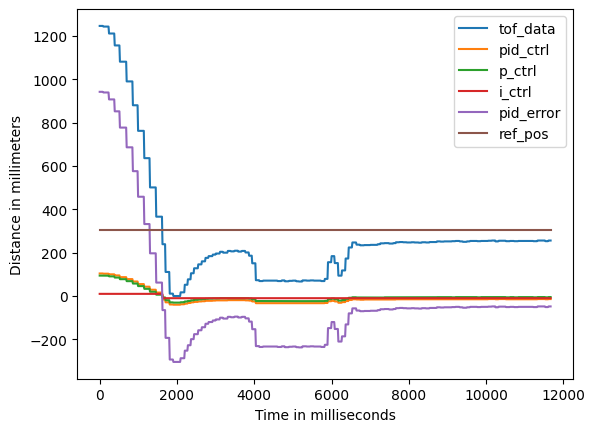

2024-03-12 17:16:29,176 | INFO     |: Disconnected from C0:89:C5:6D:2F:4B


In [10]:
tof_N = len(tof)

# Time domain figure
time = np.linspace(0., (timestamp[-1] - timestamp[0]), num=tof_N)
plt.plot(time, tof, label='tof_data')
plt.plot(time, pid_ctrl, label='pid_ctrl')
plt.plot(time, p_ctrl, label='p_ctrl')
plt.plot(time, i_ctrl, label='i_ctrl')
plt.plot(time, pid_error, label='pid_error')
plt.plot(time, np.linspace(304, 304, num=tof_N), label='ref_pos')
plt.legend()
plt.title('')
plt.xlabel('Time in milliseconds')
plt.ylabel('Distance in millimeters')
plt.show()